In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from seaborn import set_style
set_style("whitegrid")
import csv


In [155]:
rec = pd.read_csv('NFLRecords.csv')
picks = pd.read_csv('draftpicks.csv')
picks=picks.truncate(after=4079)

In [107]:
pickav=np.array([picks.loc[picks['Pick'] == i, 'DrAV'].mean() for i in range(1,257)])

In [254]:
logavg= np.log(pickav)
regavg = LinearRegression()
k=100
draftpick=np.array([[(i+k)**(-2)] for i in range(1,257)])
regavg.fit(draftpick, pickav)
MSE=sum((pickav-regavg.predict(draftpick))**2)
print(MSE)
print(regavg.coef_)

3161.6817418567043
[456427.8053407]


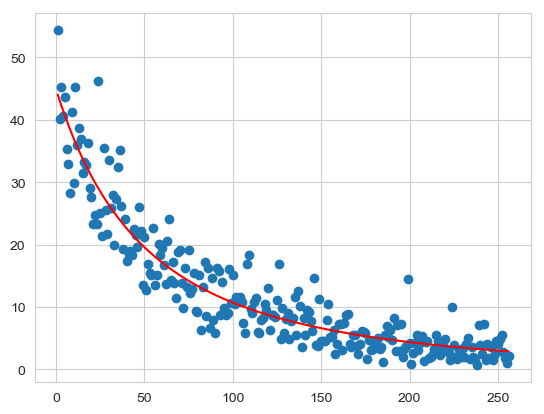

In [244]:
plt.scatter(range(1,257),pickav)
plt.plot(range(1,257),regavg.predict(draftpick),color='red')


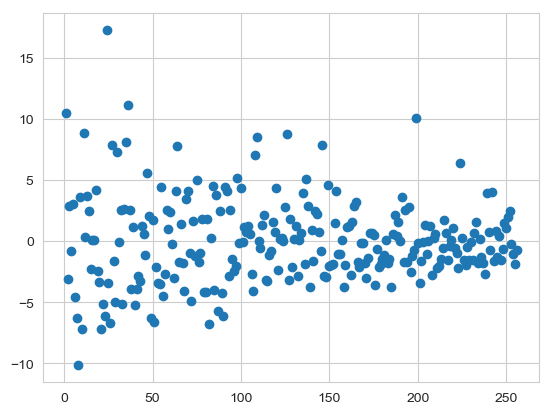

In [255]:
plt.scatter(range(1,257),pickav-regavg.predict(draftpick))

In [111]:
rec.loc[(rec['Tm']=='ARI')& (rec['Year']==2023), 'W'].values[0]

4

In [156]:
picks['SRS0']=[rec.loc[(rec['Tm']==picks.loc[pick,'Tm'])& (rec['Year']==picks.loc[pick,'Year']-1), 'SRS'].mean() for pick in picks.index]
picks['SRS1']=[rec.loc[(rec['Tm']==picks.loc[pick,'Tm'])& (rec['Year']==picks.loc[pick,'Year']), 'SRS'].mean() for pick in picks.index]
picks['SRS2']=[rec.loc[(rec['Tm']==picks.loc[pick,'Tm'])& (rec['Year']==picks.loc[pick,'Year']+1), 'SRS'].mean() for pick in picks.index]
picks['SRS3']=[rec.loc[(rec['Tm']==picks.loc[pick,'Tm'])& (rec['Year']==picks.loc[pick,'Year']+2), 'SRS'].mean() for pick in picks.index]
picks['SRS4']=[rec.loc[(rec['Tm']==picks.loc[pick,'Tm'])& (rec['Year']==picks.loc[pick,'Year']+3), 'SRS'].mean() for pick in picks.index]

In [172]:
picks['W0']=[rec.loc[(rec['Tm']==picks.loc[pick,'Tm'])& (rec['Year']==picks.loc[pick,'Year']-1), 'W'].mean() for pick in picks.index]
picks['W1']=[rec.loc[(rec['Tm']==picks.loc[pick,'Tm'])& (rec['Year']==picks.loc[pick,'Year']), 'W'].mean() for pick in picks.index]
picks['W2']=[rec.loc[(rec['Tm']==picks.loc[pick,'Tm'])& (rec['Year']==picks.loc[pick,'Year']+1), 'W'].mean() for pick in picks.index]
picks['W3']=[rec.loc[(rec['Tm']==picks.loc[pick,'Tm'])& (rec['Year']==picks.loc[pick,'Year']+2), 'W'].mean() for pick in picks.index]
picks['W4']=[rec.loc[(rec['Tm']==picks.loc[pick,'Tm'])& (rec['Year']==picks.loc[pick,'Year']+3), 'W'].mean() for pick in picks.index]

In [157]:
picks['SRSAv']=picks.loc[:,['SRS1','SRS2','SRS3','SRS4']].mean(axis=1)


In [159]:
srsreg=LinearRegression()
srsreg.fit(picks.loc[:,['SRS0']],picks.loc[:,['SRSAv']])
#plt.plot(np.linspace(-15, 15, 100),srsreg.predict(np.linspace(-15, 15, 100).reshape(-1,1)),color='red')
#plt.scatter(picks['SRS0'],picks['SRSAv'])

LinearRegression()

In [257]:
firstpicks=picks.loc[picks['Pick']<33, :]
firstpicks['inv']=((firstpicks['Pick']+100)**2).rdiv(1)

C:\Users\dphil\AppData\Local\Temp\ipykernel_31420\879889090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firstpicks['inv']=((firstpicks['Pick']+100)**2).rdiv(1)


C:\Users\dphil\anaconda3\envs\erdos_may_2024\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-0.00824051,  0.2923377 ]])

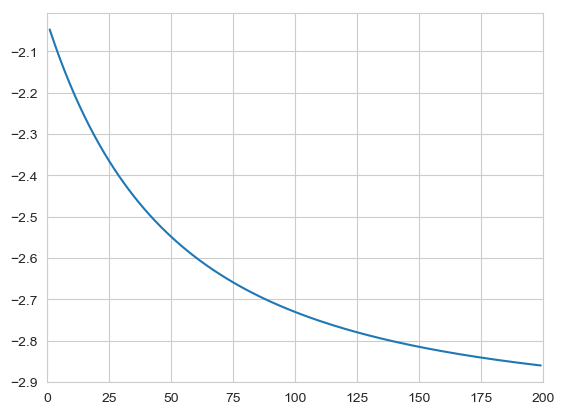

In [260]:
pickval= LinearRegression()
pickval.fit(firstpicks.loc[:,['inv','SRS0']],firstpicks.loc[:,['SRSAv']])
ran= np.array([[(i+100)**-2,-8] for i in range(1,200)])
plt.plot(range(1,200), pickval.predict(ran))
ax = plt.gca()
ax.set_xlim([0,200])
knr.coef_